In [34]:
import helper
import torch
import torch.nn.functional as F
from torch import nn, optim
from torchvision import datasets, transforms

In [35]:
# normalize data
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))])

In [36]:
# download and load data
train_set = datasets.FashionMNIST("../Data/", download=False, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

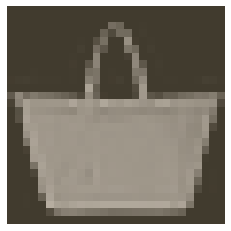

In [37]:
image, label = next(iter(train_loader))
helper.imshow(image[0, :])

### Building Network

In [38]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        # flatten image
        x = x.view(x.shape[0], -1)
        # activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

### Train Network

In [39]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

In [40]:
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print("Training loss : {}".format(running_loss / len(train_loader)))

Training loss : 0.526241714956918
Training loss : 0.4099636896809281
Training loss : 0.38056988338195186
Training loss : 0.3628007316751394
Training loss : 0.3478229307988559


In [42]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

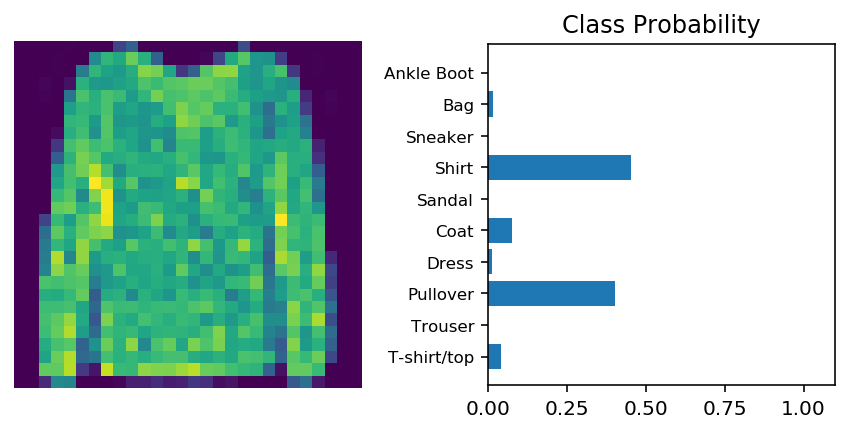

In [43]:
data_iter = iter(train_loader)
images, labels = data_iter.next()
img = images[0]

prob = torch.exp(model(img))

helper.view_classify(img, prob, version="Fashion")